# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import itertools
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns

# 1 Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')

In [3]:
df

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


As we can see the Rose wine sales data is from the year 1980 to 1995

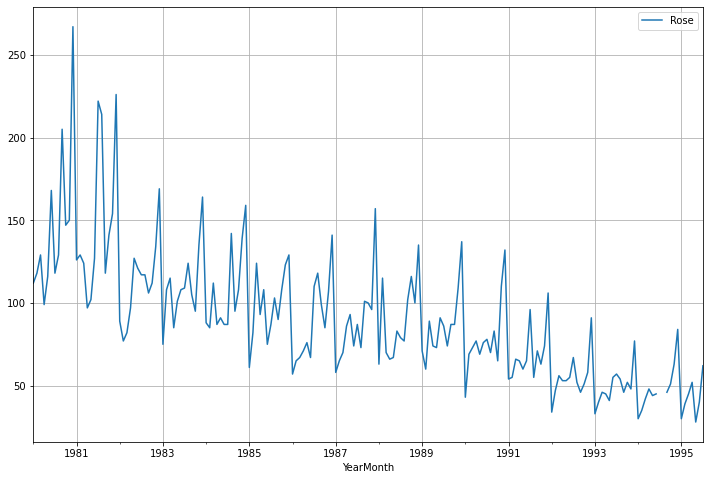

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.grid()

From the above figure we can state:
1. There is a downward trend in the data
2. There seems to be seasonality

# 2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [5]:
df.shape

(187, 1)

There are 187 rows

In [6]:
df.isnull().sum()

Rose    2
dtype: int64

As we can see there are 2 missing values

In [7]:
df.mean()

Rose    90.394595
dtype: float64

In [10]:
df.interpolate()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [11]:
df.isnull().sum()

Rose    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [143]:
df.describe()

,Rose
count,187.000000
mean,90.394595
std,38.964155
min,28.000000
25%,63.000000
50%,86.000000
75%,111.000000
max,267.000000


In [ ]:
# 1 The max number of sales in Rose is 267.
# 2 The average sales here for rose is 90.

# Plotting a year on year boxplot for the Rose wine production.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

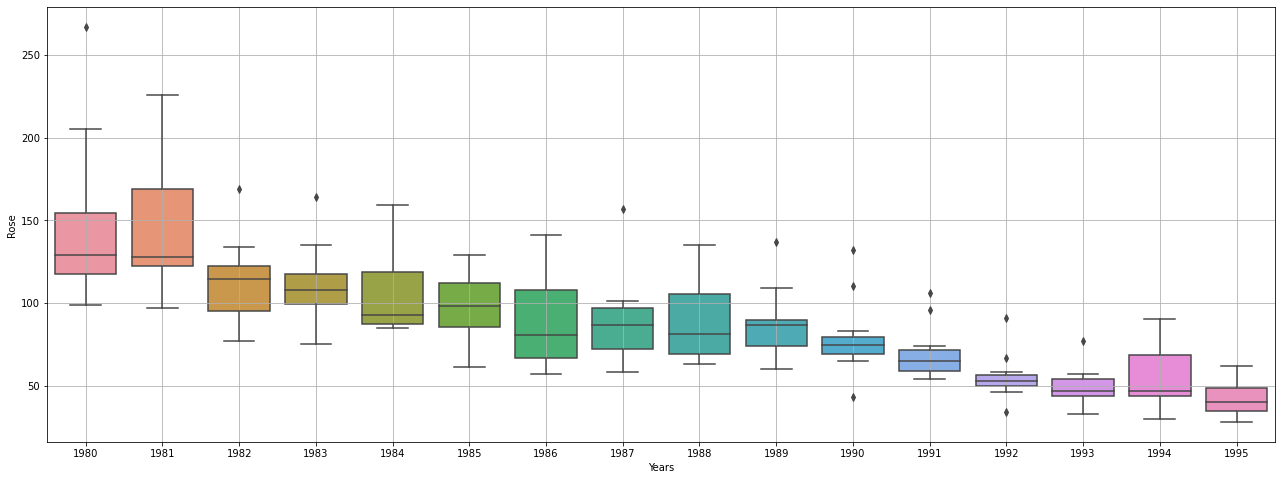

In [148]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df.index.year, df['Rose'], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Rose');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the sales of wine has some outliers for certain years.

# Plot a monthly boxplot for the sales taking all the years into account.

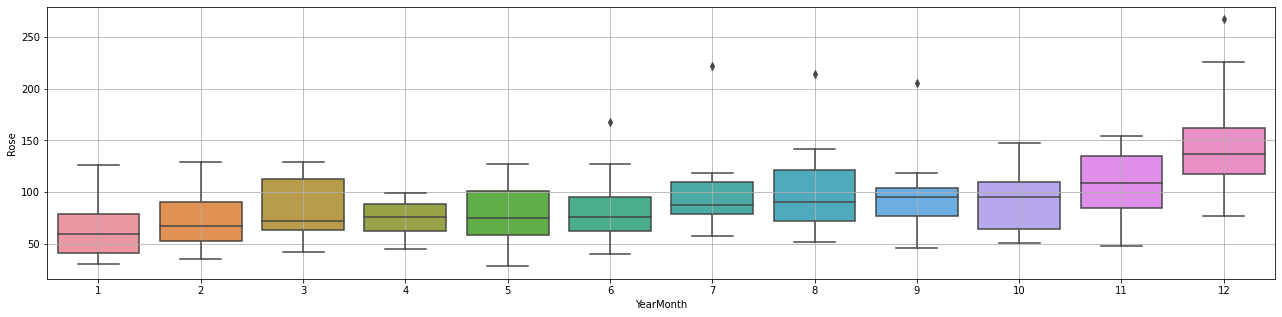

In [149]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df.index.month, df['Rose'] , ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years show very few outliers.

# Plotting a monthplot of the give Time Series.

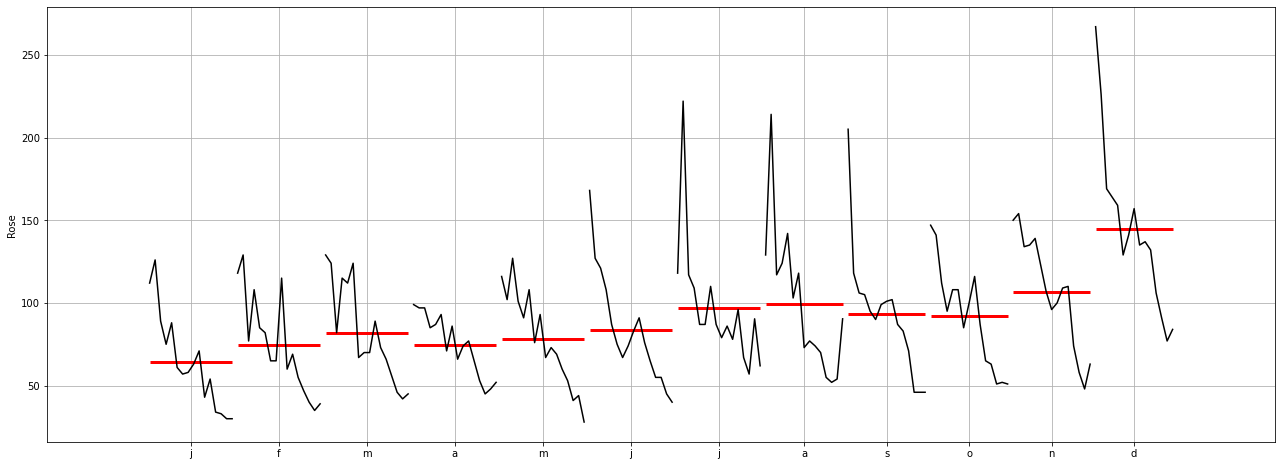

In [151]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Rose',ax=ax)
plt.grid();

# Decompose the time series

### Additive Model

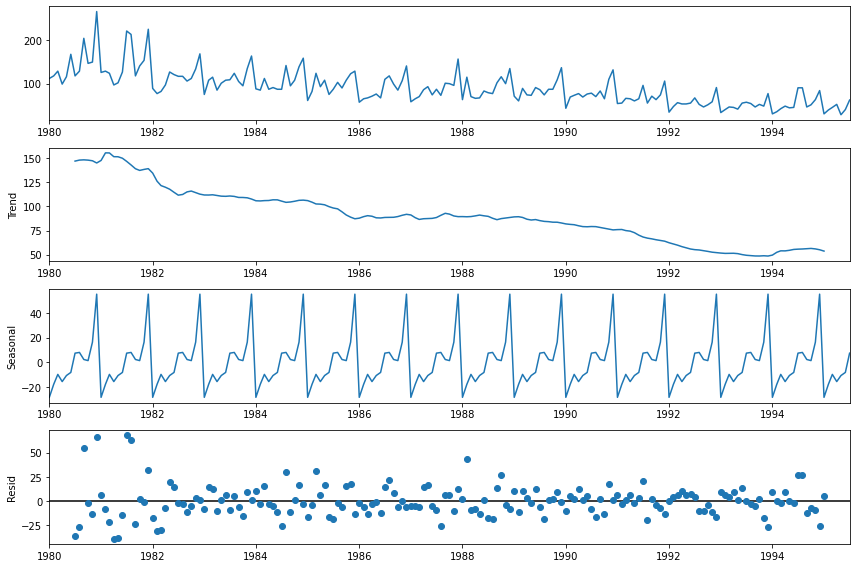

In [141]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

### Multipicative Model

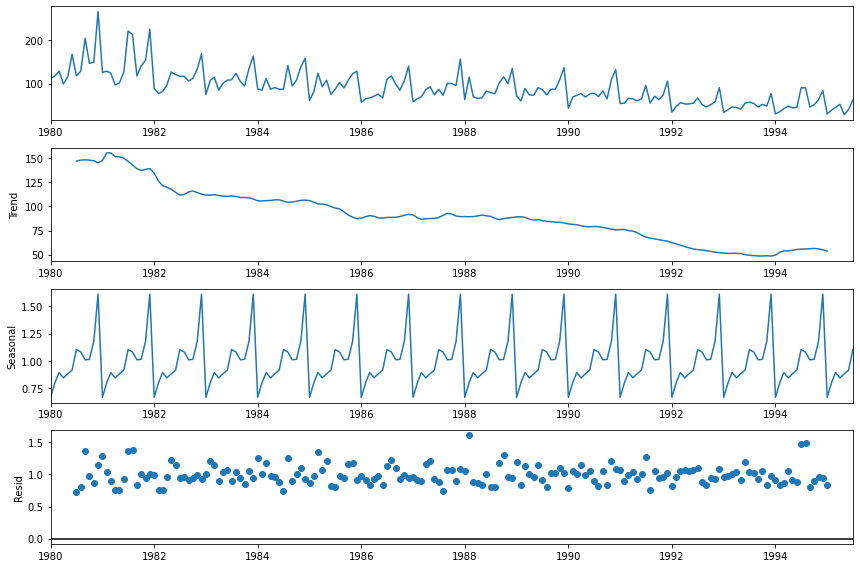

In [142]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

As per the decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

# 3) Split the data into training and test. The test data should start in 1991.

In [18]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [19]:
train = df[df.index.year < 1991]

In [20]:
train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [21]:
train.shape

(132, 1)

In [22]:
test = df[df.index.year >= 1991]

In [23]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [163]:
test.shape

(55, 1)

In [24]:
(test.shape[0]/len(df))*100

29.411764705882355

# 4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

In [25]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

# Simple Exponential Smoothing

In [26]:
model_SES = SimpleExpSmoothing(train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
model_SES_autofit = model_SES.fit(optimized=True)

In [28]:
model_SES_autofit.params

{'smoothing_level': 0.098749861875503,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38709088615482,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104998
1991-02-01    87.104998
1991-03-01    87.104998
1991-04-01    87.104998
1991-05-01    87.104998
1991-06-01    87.104998
1991-07-01    87.104998
1991-08-01    87.104998
1991-09-01    87.104998
1991-10-01    87.104998
1991-11-01    87.104998
1991-12-01    87.104998
1992-01-01    87.104998
1992-02-01    87.104998
1992-03-01    87.104998
1992-04-01    87.104998
1992-05-01    87.104998
1992-06-01    87.104998
1992-07-01    87.104998
1992-08-01    87.104998
1992-09-01    87.104998
1992-10-01    87.104998
1992-11-01    87.104998
1992-12-01    87.104998
1993-01-01    87.104998
1993-02-01    87.104998
1993-03-01    87.104998
1993-04-01    87.104998
1993-05-01    87.104998
1993-06-01    87.104998
1993-07-01    87.104998
1993-08-01    87.104998
1993-09-01    87.104998
1993-10-01    87.104998
1993-11-01    87.104998
1993-12-01    87.104998
1994-01-01    87.104998
1994-02-01    87.104998
1994-03-01    87.104998
1994-04-01    87.104998
1994-05-01    87.104998
1994-06-01    87

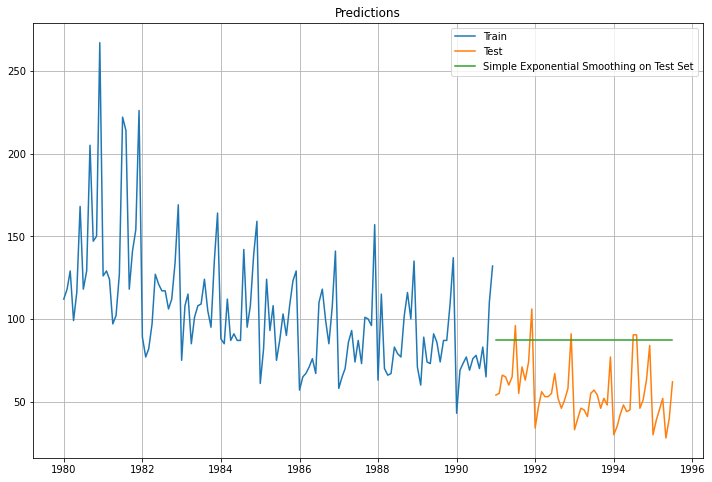

In [30]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');

In [31]:
# RMSE score
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['SES'])
resultsDf

,Test RMSE
SES,35.936211


# Double Exponential Smoothing

In [32]:
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print(model_DES.params)

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [34]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01     86.863579
1991-02-01     88.028056
1991-03-01     89.192534
1991-04-01     90.357011
1991-05-01     91.521488
1991-06-01     92.685966
1991-07-01     93.850443
1991-08-01     95.014921
1991-09-01     96.179398
1991-10-01     97.343876
1991-11-01     98.508353
1991-12-01     99.672831
1992-01-01    100.837308
1992-02-01    102.001785
1992-03-01    103.166263
1992-04-01    104.330740
1992-05-01    105.495218
1992-06-01    106.659695
1992-07-01    107.824173
1992-08-01    108.988650
1992-09-01    110.153127
1992-10-01    111.317605
1992-11-01    112.482082
1992-12-01    113.646560
1993-01-01    114.811037
1993-02-01    115.975515
1993-03-01    117.139992
1993-04-01    118.304469
1993-05-01    119.468947
1993-06-01    120.633424
1993-07-01    121.797902
1993-08-01    122.962379
1993-09-01    124.126857
1993-10-01    125.291334
1993-11-01    126.455811
1993-12-01    127.620289
1994-01-01    128.784766
1994-02-01    129.949244
1994-03-01    131.113721
1994-04-01    132.278199


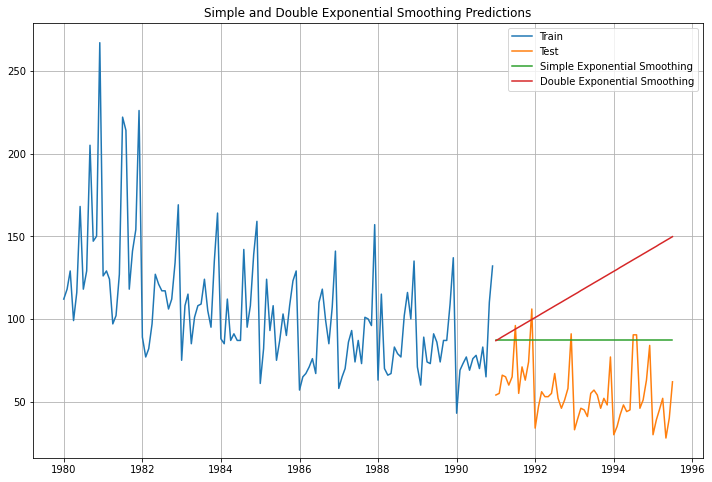

In [35]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing')
plt.plot(DES_predict, label='Double Exponential Smoothing')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [36]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917


# Triple Exponential Smoothing

In [37]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()
print(model_TES.params)

{'smoothing_level': 0.13347641868338753, 'smoothing_slope': 0.013789704358432745, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.4030611244976, 'initial_slope': 0.0, 'initial_seasons': array([ 38.68454626,  51.02041418,  58.99159836,  48.32970191,
        57.11972644,  62.54826167,  72.43325289,  78.49841947,
        74.4772836 ,  72.54479058,  90.61346444, 132.86448519]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [38]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     44.130055
1991-02-01     56.070485
1991-03-01     63.646230
1991-04-01     52.588895
1991-05-01     60.983482
1991-06-01     66.016578
1991-07-01     75.506131
1991-08-01     81.175859
1991-09-01     76.759285
1991-10-01     74.431354
1991-11-01     92.104589
1991-12-01    133.960171
1992-01-01     39.384794
1992-02-01     51.325224
1992-03-01     58.900969
1992-04-01     47.843634
1992-05-01     56.238221
1992-06-01     61.271317
1992-07-01     70.760870
1992-08-01     76.430598
1992-09-01     72.014024
1992-10-01     69.686093
1992-11-01     87.359328
1992-12-01    129.214910
1993-01-01     34.639533
1993-02-01     46.579963
1993-03-01     54.155708
1993-04-01     43.098373
1993-05-01     51.492960
1993-06-01     56.526056
1993-07-01     66.015609
1993-08-01     71.685337
1993-09-01     67.268763
1993-10-01     64.940832
1993-11-01     82.614067
1993-12-01    124.469649
1994-01-01     29.894272
1994-02-01     41.834702
1994-03-01     49.410447
1994-04-01     38.353113


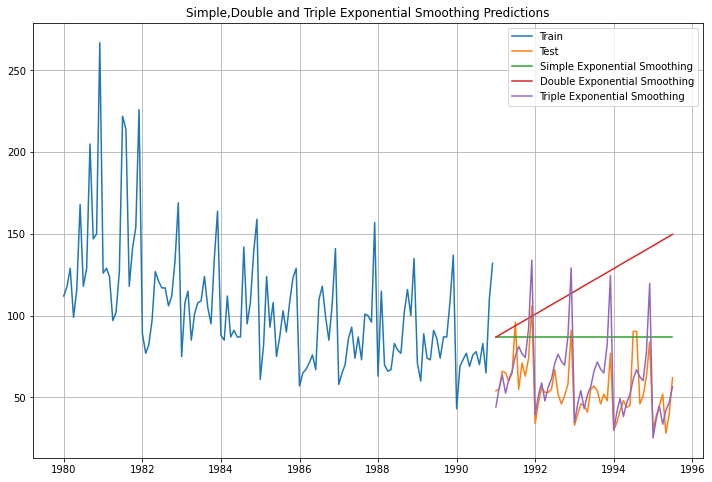

In [39]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing')
plt.plot(DES_predict, label='Double Exponential Smoothing')
plt.plot(TES_predict, label='Triple Exponential Smoothing')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [40]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670


In [41]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()
print(model_TES_am.params)

{'smoothing_level': 0.10609637565452212, 'smoothing_slope': 0.04843844117216271, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.65565133724536, 'initial_slope': 0.0, 'initial_seasons': array([1.47550223, 1.65927089, 1.80572587, 1.58888771, 1.77822653,
       1.92604305, 2.11649389, 2.25135133, 2.11690513, 2.08112758,
       2.40927203, 3.30448015]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [43]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01     56.674338
1991-02-01     63.471273
1991-03-01     68.788792
1991-04-01     60.277825
1991-05-01     67.180380
1991-06-01     72.461079
1991-07-01     79.292413
1991-08-01     83.989694
1991-09-01     78.640175
1991-10-01     76.982907
1991-11-01     88.741358
1991-12-01    121.193703
1992-01-01     53.882213
1992-02-01     60.331398
1992-03-01     65.371777
1992-04-01     57.271138
1992-05-01     63.815403
1992-06-01     68.816385
1992-07-01     75.287324
1992-08-01     79.729412
1992-09-01     74.634309
1992-10-01     73.044743
1992-11-01     84.182240
1992-12-01    114.940562
1993-01-01     51.090087
1993-02-01     57.191523
1993-03-01     61.954762
1993-04-01     54.264450
1993-05-01     60.450425
1993-06-01     65.171692
1993-07-01     71.282236
1993-08-01     75.469130
1993-09-01     70.628442
1993-10-01     69.106579
1993-11-01     79.623121
1993-12-01    108.687421
1994-01-01     48.297962
1994-02-01     54.051648
1994-03-01     58.537747
1994-04-01     51.257763


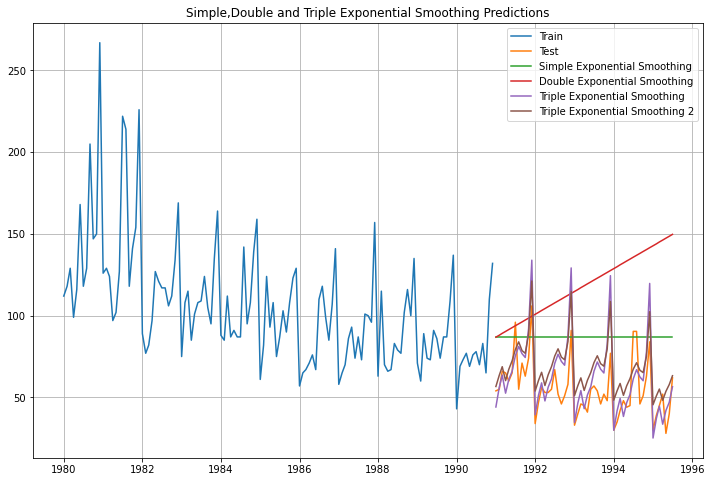

In [44]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing')
plt.plot(DES_predict, label='Double Exponential Smoothing')
plt.plot(TES_predict, label='Triple Exponential Smoothing')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing 2')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [45]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES2'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939


# Linear Regression Model

In [46]:
len(train)

132

In [47]:
len(test)

55

In [48]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [49]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [50]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


Last few rows of Training Data


,Rose,time
YearMonth,,
1990-08-01,70.0,128
1990-09-01,83.0,129
1990-10-01,65.0,130
1990-11-01,110.0,131
1990-12-01,132.0,132


First few rows of Test Data


,Rose,time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


Last few rows of Test Data


,Rose,time
YearMonth,,
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185
1995-06-01,40.0,186
1995-07-01,62.0,187


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

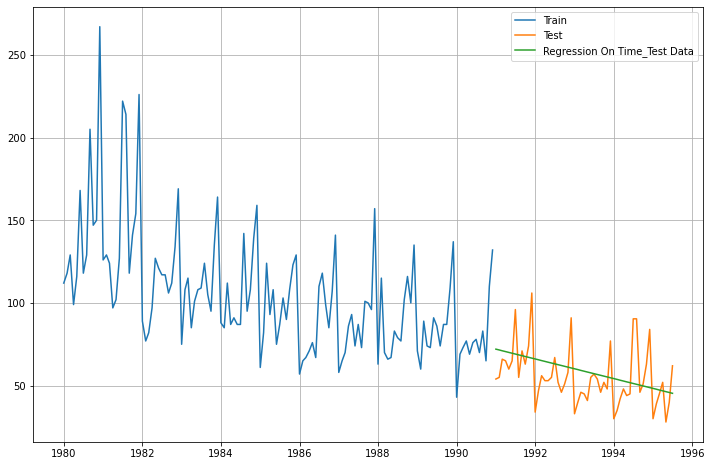

In [54]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [55]:
from sklearn import metrics

In [56]:
rmse_lr_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)

In [57]:
rmse_lr_test

16.979413812873954

In [58]:
resultsDf.loc['LR'] = rmse_lr_test

In [59]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414


# Naive Approach

In [60]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [61]:
NaiveModel_train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [62]:
NaiveModel_test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [63]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

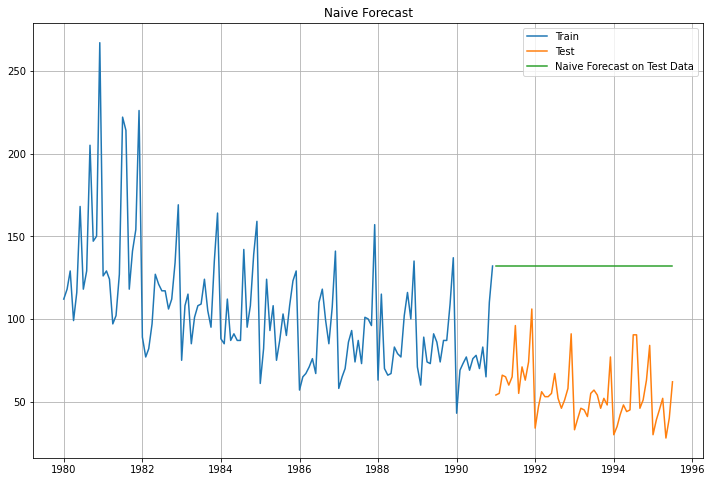

In [64]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [65]:
rmse_nb_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)

In [66]:
rmse_nb_test

78.39608287035963

In [67]:
resultsDf.loc['NB'] = rmse_nb_test

In [68]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083


# Simple Average

In [69]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [70]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


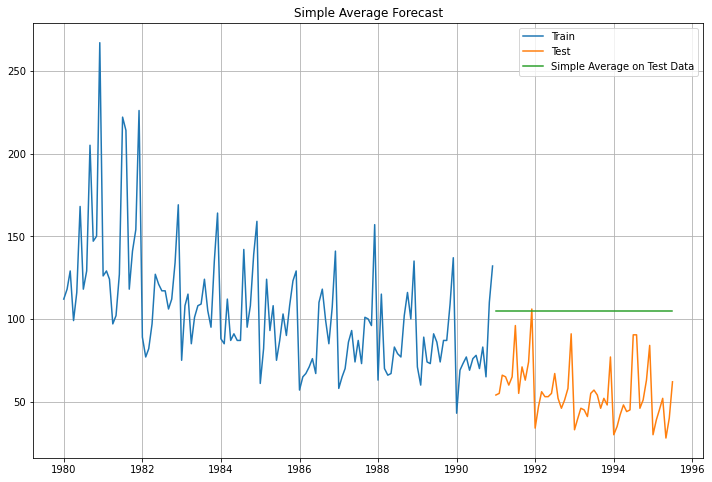

In [71]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [72]:
rmse_sm_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)

In [73]:
resultsDf.loc['Simple Average'] = rmse_sm_test

In [74]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083
Simple Average,52.318735


# Moving Average

In [77]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [78]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


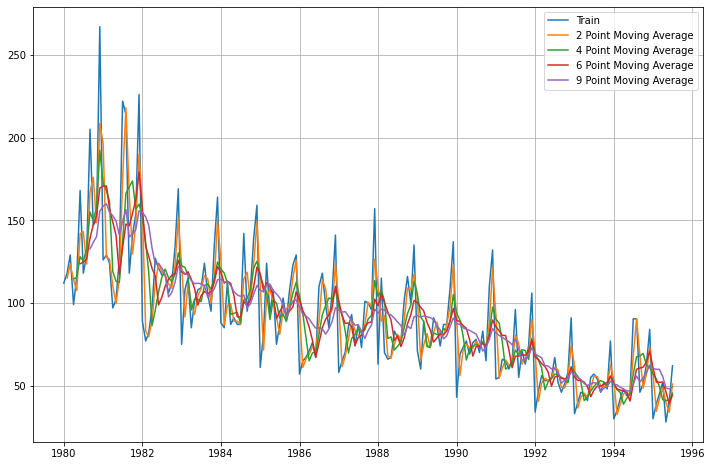

In [79]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

In [81]:
trailing_MovingAverage_train.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


In [82]:
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667


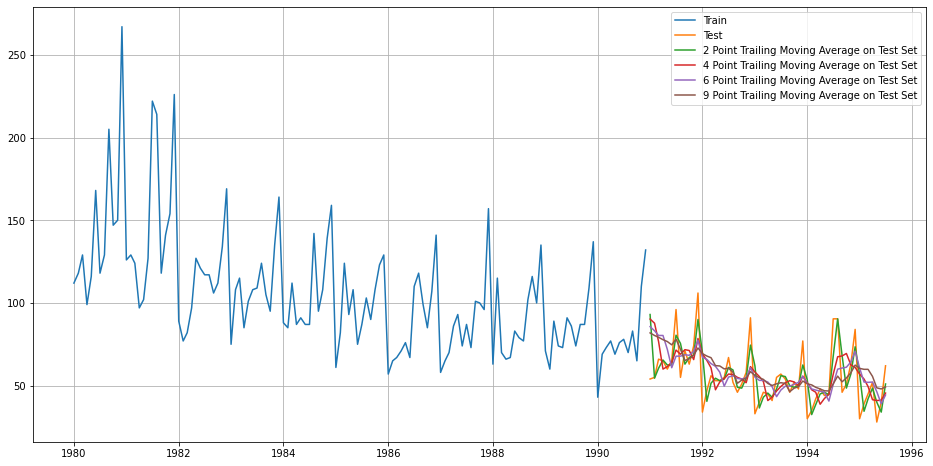

In [83]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [84]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501


In [85]:
all_ma = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, all_ma])
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083
Simple Average,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163


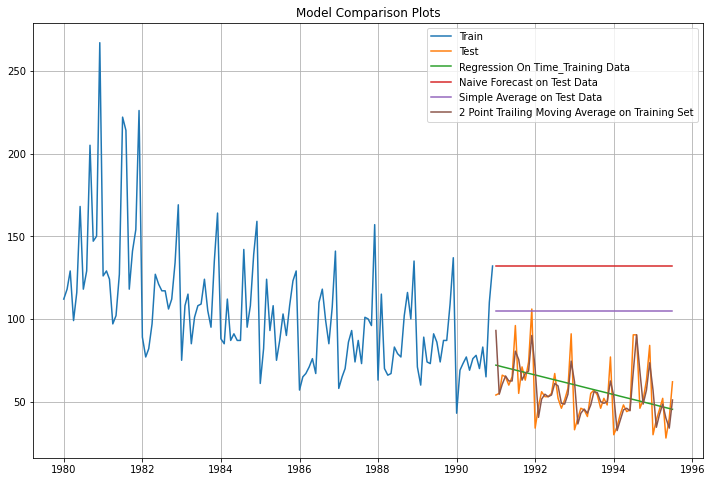

In [86]:
# Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# 5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [223]:
# H0: Null Hypothesis: The time series is not stationary
# Ha: Alternate Hypothesis: The time series is stationary

In [224]:
# Checking for Stationarity

In [87]:
from statsmodels.tsa.stattools import adfuller

In [89]:
dftest = adfuller(df)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.934
DF test p-value is 0.3163


In [227]:
# As p-value is > 0.05 we fail to reject H0 and we can say that the time series is not stationary

In [91]:
data_diff = df.diff(periods=1)
data_diff.dropna(inplace=True)

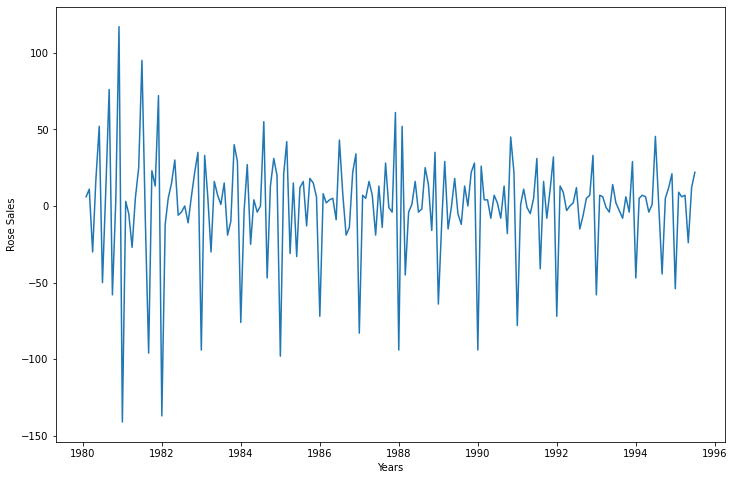

In [92]:
plt.plot(data_diff)
plt.xlabel('Years')
plt.ylabel('Rose Sales');

In [93]:
dftest_diff = adfuller(data_diff)
dftest_diff
print('DF test statistic is %3.3f' %dftest_diff[0])
print('DF test p-value is %1.4f' %dftest_diff[1])

DF test statistic is -7.856
DF test p-value is 0.0000


As we can see after taking difference p-value drops to 0 which is < 0.05 so we reject H0 and conclude that 
the time series is now stationary and we can proceed with our models

# 6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [94]:
train_diff = train.diff(periods=1)

In [95]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [96]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [97]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

# ARIMA Model

In [236]:
# best_arima_aic = np.inf
# best_arima_pdq = None

In [98]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    arima_model = ARIMA(train,order=param).fit()
    print('Parmas{} - AICs-{}'.format(param,arima_model.aic))     
            
#         try:
#             arima_model = ARIMA(train,order=param).fit()
            
#             print('all aic',arima_model.aic)
#             if arima_model.aic < best_arima_aic:#defining a conditional statement about whether the AIC of the model
#                 #just built is less than the best_aic
#                 best_arima_aic = arima_model.aic#defining the new value of AIC from the SARIMA model as the best_aic
#                 best_arima_pdq = param#storing the (p,d,q) values in the variable best_pdq
#         except:
#             #print("Unexpected error:", sys.exc_info()[0])
#             continue
# print("Best ARIMA{} - AIC:{}".format(best_pdq, best_aic))

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

Parmas(0, 0, 0) - AICs-1324.8997029577333
Parmas(0, 0, 1) - AICs-1305.4684057684517
Parmas(0, 1, 0) - AICs-1335.1526583086775
Parmas(0, 1, 1) - AICs-1280.7261830464722
Parmas(1, 0, 0) - AICs-1301.5463044356427
Parmas(1, 0, 1) - AICs-1294.5105851813066
Parmas(1, 1, 0) - AICs-1319.3483105801852
Parmas(1, 1, 1) - AICs-1277.7757491263264


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [238]:
# So the best AIC is AIC:1277.775752684674 with p = 1, d = 1 and q = 1

In [99]:
arima_model = ARIMA(train,order=(1,1,1)).fit()

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [100]:
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.279
Date:                Fri, 06 Nov 2020   AIC                           1277.776
Time:                        00:02:25   BIC                           1289.277
Sample:                    02-01-1980   HQIC                          1282.449
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4871      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.Rose     0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.Rose    -0.9999      0.035    -28.64

In [101]:
test.shape

(55, 1)

In [102]:
pred_arima = arima_model.forecast(steps=55)

In [103]:
from sklearn.metrics import mean_squared_error
rmse_arima = np.sqrt(mean_squared_error(test,pred_arima[0]))
rmse_arima

17.362948560162664

In [104]:
resultsDf.loc['ARIMA'] = rmse_arima

In [105]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083
Simple Average,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163


# SARIMA Model

In [106]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [161]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    for param_seasonal in seasonal_pdq:#looping through the (P,D,Q,freq) values for SARIMA
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train,#defining the SARIMA model after taking
                                                   # the difference of the training data
                                             order = param,#setting the (p,d,q) values
                                             seasonal_order = param_seasonal,#setting the (P,D,Q,freq) values
                                             enforce_stationarity=True)
            results = temp_model.fit()#fitting the above built SARIMA model

            print('AICs',results.aic,param,param_seasonal)
            if results.aic < best_aic:#defining a conditional statement about whether the AIC of the model
                #just built is less than the best_aic
                best_aic = results.aic#defining the new value of AIC from the SARIMA model as the best_aic
                best_pdq = param#storing the (p,d,q) values in the variable best_pdq
                best_seasonal_pdq = param_seasonal#storing the (P,D,Q,freq) values in the variable 
                #best_seasonal_pdq
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1619.8058064648494 (0, 0, 0) (0, 0, 0, 12)
AICs 1494.705416425141 (0, 0, 0) (0, 0, 1, 12)
AICs 1141.0963740543405 (0, 0, 0) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1128.4433572213059 (0, 0, 0) (0, 1, 1, 12)
AICs 1290.7426582879702 (0, 0, 0) (1, 0, 0, 12)
AICs 1278.7693833684775 (0, 0, 0) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1126.7757190465081 (0, 0, 0) (1, 1, 0, 12)
AICs 1128.638138174888 (0, 0, 0) (1, 1, 1, 12)
AICs 1504.152196173206 (0, 0, 1) (0, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1409.6492997439989 (0, 0, 1) (0, 0, 1, 12)
AICs 1131.6657509620677 (0, 0, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1114.4953305160757 (0, 0, 1) (0, 1, 1, 12)
AICs 1273.0698941200853 (0, 0, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1256.521486824628 (0, 0, 1) (1, 0, 1, 12)
AICs 1114.394194123946 (0, 0, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1115.412339002552 (0, 0, 1) (1, 1, 1, 12)
AICs 1333.1546729124348 (0, 1, 0) (0, 0, 0, 12)
AICs 1305.4883440061903 (0, 1, 0) (0, 0, 1, 12)
AICs 1180.1133206633895 (0, 1, 0) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1143.0705227620465 (0, 1, 0) (0, 1, 1, 12)
AICs 1284.9144625413817 (0, 1, 0) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1262.104787511565 (0, 1, 0) (1, 0, 1, 12)
AICs 1152.9230017557468 (0, 1, 0) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1145.068968980401 (0, 1, 0) (1, 1, 1, 12)
AICs 1282.309831981724 (0, 1, 1) (0, 0, 0, 12)
AICs 1252.7908109275593 (0, 1, 1) (0, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1132.0360347526794 (0, 1, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1091.9283273477477 (0, 1, 1) (0, 1, 1, 12)
AICs 1231.2375309655513 (0, 1, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1205.5757262219477 (0, 1, 1) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1101.0597790398358 (0, 1, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1093.5655297138298 (0, 1, 1) (1, 1, 1, 12)
AICs 1343.5233660883434 (1, 0, 0) (0, 0, 0, 12)
AICs 1312.8241747291313 (1, 0, 0) (0, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1135.1739591979936 (1, 0, 0) (0, 1, 0, 12)
AICs 1115.6074075248453 (1, 0, 0) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1274.7672582502553 (1, 0, 0) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1251.902752506171 (1, 0, 0) (1, 0, 1, 12)
AICs 1115.695940543879 (1, 0, 0) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1116.202264647656 (1, 0, 0) (1, 1, 1, 12)
AICs 1296.573206549896 (1, 0, 1) (0, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1266.9845340108418 (1, 0, 1) (0, 0, 1, 12)
AICs 1131.1049382573765 (1, 0, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1115.9442101107447 (1, 0, 1) (0, 1, 1, 12)
AICs 1245.4743718810969 (1, 0, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1220.121046803456 (1, 0, 1) (1, 0, 1, 12)
AICs 1115.6028642126525 (1, 0, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1116.8667854256666 (1, 0, 1) (1, 1, 1, 12)
AICs 1317.3503105381478 (1, 1, 0) (0, 0, 0, 12)
AICs 1291.9862084157432 (1, 1, 0) (0, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1173.4221788279342 (1, 1, 0) (0, 1, 0, 12)
AICs 1131.962970084662 (1, 1, 0) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1273.8470575949261 (1, 1, 0) (1, 0, 0, 12)
AICs 1249.051366501979 (1, 1, 0) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1141.2463364856226 (1, 1, 0) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1133.651348244408 (1, 1, 0) (1, 1, 1, 12)
AICs 1280.5742295345465 (1, 1, 1) (0, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1250.8573560235182 (1, 1, 1) (0, 0, 1, 12)
AICs 1128.5728724437831 (1, 1, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1091.625268367176 (1, 1, 1) (0, 1, 1, 12)
AICs 1228.8192722639833 (1, 1, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1204.7049021715343 (1, 1, 1) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1100.2313402243362 (1, 1, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1093.4274803996352 (1, 1, 1) (1, 1, 1, 12)
Best SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 model - AIC:1091.625268367176


In [248]:
# So the best params are: 
# p = 1, d = 1, q = 1
# P = 0, D = 1, Q = 1
# with a seasonal parameter of 12
# and best AIC of 1091.6252683166028

In [108]:
sarima_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 1, 1, 12),
                                      enforce_stationarity=True).fit()


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [109]:
print(sarima_model.summary().tables[0])
print(sarima_model.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -541.813
Date:                            Fri, 06 Nov 2020   AIC                           1091.625
Time:                                    00:11:00   BIC                           1102.742
Sample:                                01-01-1980   HQIC                          1096.139
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1492      0.085      1.758      0.079      -0.017       0.316
ma.L1         -0.9265      0.063   

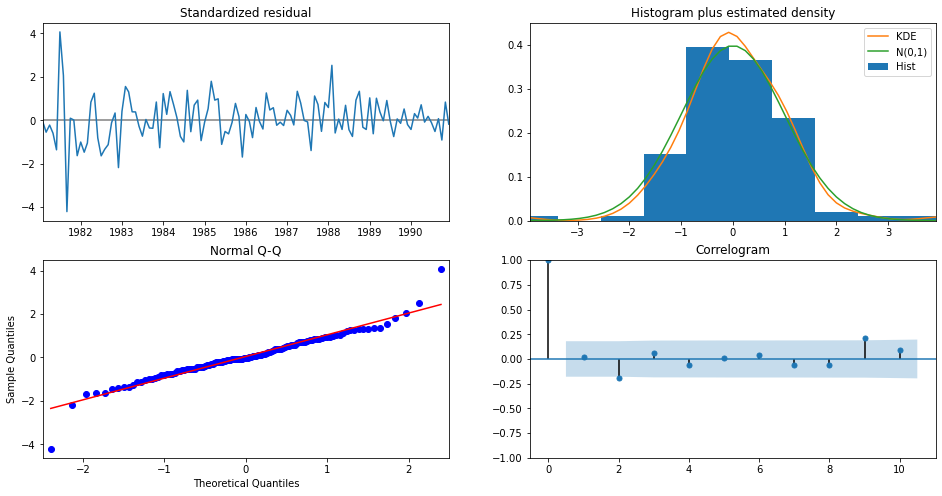

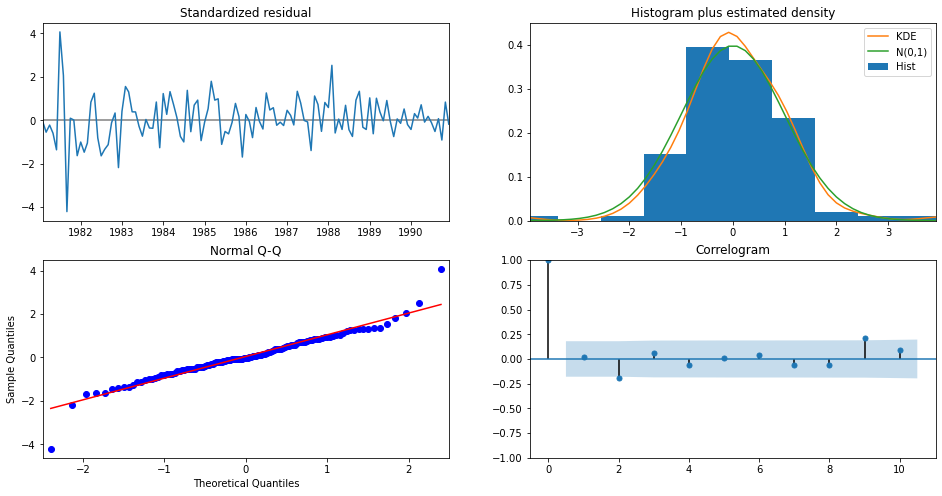

In [110]:
sarima_model.plot_diagnostics(figsize=(16,8))

In [111]:
test.shape

(55, 1)

In [112]:
pred_sarima = sarima_model.get_forecast(steps=55)

In [113]:
rmse_sarima = np.sqrt(mean_squared_error(test,pred_sarima.predicted_mean))
rmse_sarima

15.61758936360035

In [114]:
resultsDf.loc['SARIMA'] = rmse_sarima

In [115]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083
Simple Average,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163


# 7) Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [260]:
# ACF and PACF plots

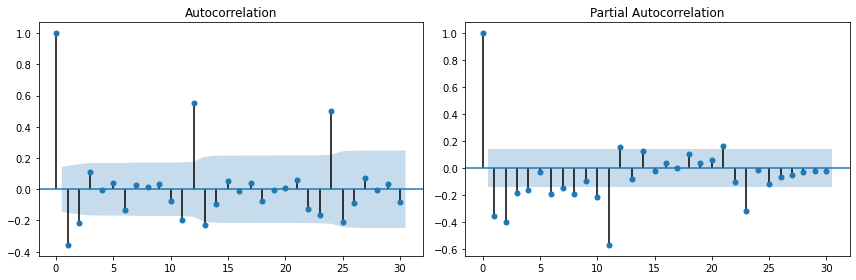

In [116]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(data_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [262]:
# From ACF and PACF plots above we can notive few points - 
# 1. Significant lag after which the ACF cuts-off is 2 that is q = 2
# 2. Significant lag after which the PACF cuts-off is 4 that is p = 4
# 3. Searsonal lag is 12

# ARIMA Model

In [152]:
manual_arima_model = ARIMA(train,order=(3,1,2)).fit()

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [153]:
manual_arima_model.aic

1280.9692488930277

In [154]:
print(manual_arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.949
Date:                Fri, 06 Nov 2020   AIC                           1280.969
Time:                        20:42:06   BIC                           1301.096
Sample:                    02-01-1980   HQIC                          1289.147
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4883      0.085     -5.723      0.000      -0.656      -0.321
ar.L1.D.Rose    -0.3558      0.332     -1.071      0.284      -1.007       0.295
ar.L2.D.Rose     0.0279      0.120      0.23

In [162]:
pred_manual_arima = manual_arima_model.forecast(steps=55)

In [163]:
rmse_manual_arima = np.sqrt(mean_squared_error(test,pred_manual_arima[0]))
rmse_manual_arima

17.195899987573895

In [157]:
resultsDf.loc['Manual ARIMA'] = rmse_manual_arima

In [158]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083
Simple Average,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163


# SARIMA Model

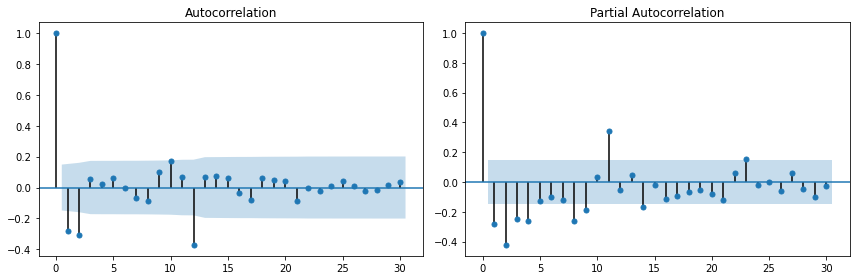

In [159]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf((df.diff(12).dropna()).diff(1).dropna(), lags=30, ax=axes[0])
smt.graphics.plot_pacf((df.diff(12).dropna()).diff(1).dropna(), lags=30, ax=axes[1])
plt.tight_layout()

In [271]:
# P = 2, D = 1, Q = 1

In [126]:
sarima_manual_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(4, 1, 2),
                                      seasonal_order=(2, 1, 1, 12),
                                      enforce_stationarity=True).fit()


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [127]:
print(sarima_manual_model.summary().tables[0])
print(sarima_manual_model.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -538.098
Date:                              Fri, 06 Nov 2020   AIC                           1096.196
Time:                                      00:12:37   BIC                           1123.987
Sample:                                  01-01-1980   HQIC                          1107.481
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5339      0.406     -1.315      0.188      -1.329       0.262
ar.L2         -0.12

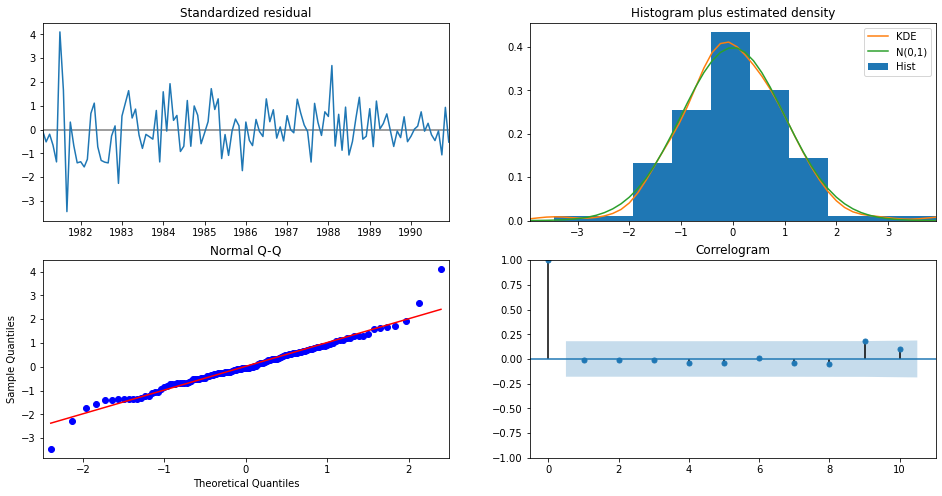

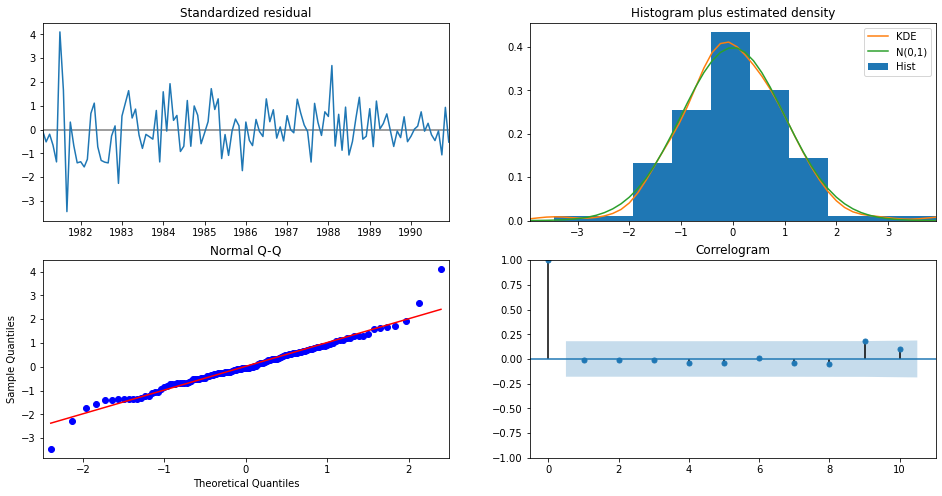

In [128]:
sarima_manual_model.plot_diagnostics(figsize=(16,8))

In [129]:
pred_manual_sarima = sarima_manual_model.get_forecast(steps=55)

In [130]:
rmse_manual_sarima = np.sqrt(mean_squared_error(test,pred_manual_sarima.predicted_mean))
rmse_manual_sarima

15.320526961138672

In [131]:
resultsDf.loc['Manual SARIMA'] = rmse_manual_sarima

# 8) Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [160]:
resultsDf

,Test RMSE
SES,35.936211
DES,68.971917
TES,16.823670
TES2,17.247939
LR,16.979414
NB,78.396083
Simple Average,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163


# 9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [279]:
# The lowest RMSE score is of Manual SARIMA

In [133]:
full_model = sm.tsa.statespace.SARIMAX(df,
                                      order=(4, 1, 2),
                                      seasonal_order=(2, 1, 1, 12),
                                      enforce_stationarity=True).fit()

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [134]:
print(full_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -763.426
Date:                              Fri, 06 Nov 2020   AIC                           1546.853
Time:                                      00:13:04   BIC                           1578.443
Sample:                                  01-01-1980   HQIC                          1559.668
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3871      0.517     -0.749      0.454      -1.400       0.626
ar.L2         -0.09

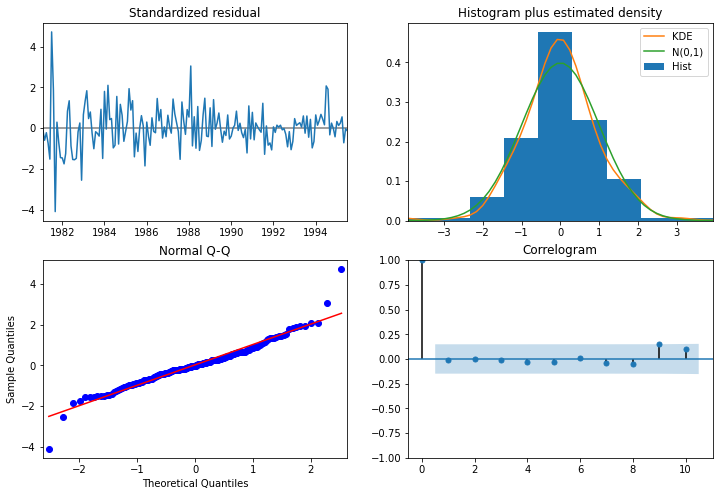

In [135]:
full_model.plot_diagnostics();

In [136]:
pred_full_model_sarima = full_model.get_forecast(steps=12)

In [138]:
rmse_manual_sarima = np.sqrt(mean_squared_error(df,full_model.fittedvalues))
rmse_manual_sarima

28.98026756614027

In [139]:
pred_full_manual_SARIMA_date = pred_full_model_sarima.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-01',end='1996-07-01', freq='M'))

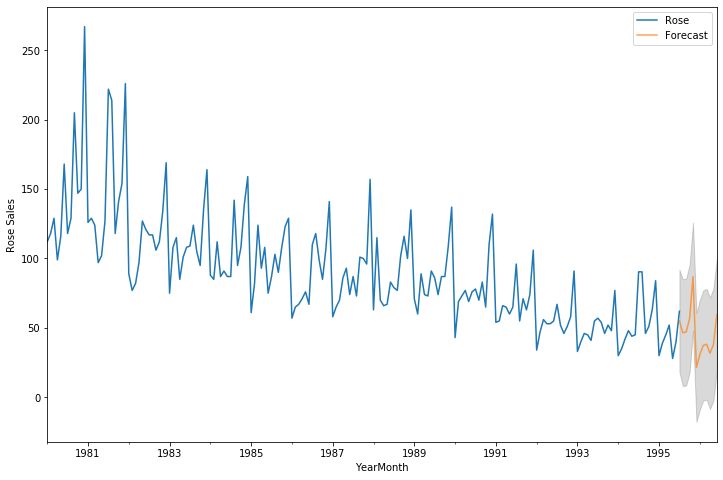

In [291]:
# plot the forecast along with the confidence band

axis = data.plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

# 10) Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

From the model build above we have following findings: 
Moving Average part is quite significant than the Auto Regressive part.  
The KDE plot of the residuals is almost similar with the normal distribution.  
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots)  follows the linear trend of the samples taken from a standard normal distribution with  N(0, 1). Again, this shows that the residuals are normally distributed.  
The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the  bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.  
From this we can conclude that the residuals are random with no information and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It seems that our SARIMA model is working fine. 
From business point of view we can see from the forecast plot above, the predicted sales of ‘Rose’ wine of future 12 months seem to be going down, there is seasonal effect which can cause sales go to up but overall sales are decreasing every year , as a company we can do the following: 
We can offer discounts to the customers in the festive season.  
We can give free samples to the customers for tasting and in return hope for feedback  which in return helps us to gain information about what is wrong with this wine.  
Depending on the taste feedback we can add flavours.  
As we know different wines are for different occasions we can also provide the same  knowledge to the customers.  
Social media is a powerful tool to promote our product.  